## Tarea - Métodos de Aprendizajes de Máquinas en Data Science

### Integrantes: Sofía Álvarez, Sebastián Dinator.

In [2]:
# Importando librerías
import pandas as pd
import numpy as np
from sympy import Matrix
from datetime import datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Graficos
from plotnine import ggplot
from plotnine import *

In [107]:
# Importando la data
df = pd.read_csv('dataTaxi.csv')
df

,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,DoW,Hora_Inicio,Hora_Fin,distKilometros
0,1,-33.484436,-70.734913,-33.437822,-70.647421,1,sÃ¡bado,01-03-14 01:28,01-03-14 01:59,9.640889
1,3,-33.523092,-70.782872,-33.437234,-70.647150,0,sÃ¡bado,01-03-14 00:04,01-03-14 00:44,15.816194
2,4,-33.455709,-70.631109,-33.437341,-70.647136,0,sÃ¡bado,01-03-14 00:33,01-03-14 00:42,2.529204
3,5,-33.294220,-70.883511,-33.437682,-70.647190,0,sÃ¡bado,01-03-14 00:20,01-03-14 00:56,27.161926
4,6,-33.437601,-70.647152,-33.294479,-70.883178,10,sÃ¡bado,01-03-14 10:16,01-03-14 10:53,27.117458
...,...,...,...,...,...,...,...,...,...,...
452161,630819,-33.410845,-70.587625,-33.403157,-70.794847,23,domingo,31-07-16 23:18,31-07-16 23:44,19.275570
452162,630820,-33.378059,-70.659924,-33.410613,-70.794746,22,domingo,31-07-16 22:43,31-07-16 23:06,13.044041
452163,630821,-33.579867,-70.705105,-33.402888,-70.794640,23,domingo,31-07-16 23:02,31-07-16 23:33,21.382867
452164,630822,-33.396931,-70.792297,-33.433149,-70.624117,22,domingo,31-07-16 22:31,31-07-16 23:02,16.138766


# Problema 1
## Limpieza de Datos

In [108]:
print('Tipos de datos:')
display(df.dtypes)
print('Descripción de los datos:')
display(df.describe())

Tipos de datos:


Unnamed: 0          int64
LatitudPAB        float64
LongitudPAB       float64
LatitudCOM        float64
LongitudCOM       float64
Horas               int64
DoW                object
Hora_Inicio        object
Hora_Fin           object
distKilometros    float64
dtype: object

Descripción de los datos:


,Unnamed: 0,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,Horas,distKilometros
count,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000,452166.000000
mean,315556.037500,-33.436718,-70.655944,-33.442694,-70.660850,11.793052,10.598621
std,181053.682589,0.055233,0.074918,0.060474,0.077424,6.895245,7.393171
min,1.000000,-33.868754,-70.979306,-33.869713,-70.979998,0.000000,0.030007
25%,160921.250000,-33.453083,-70.699870,-33.458440,-70.712886,7.000000,4.548679
50%,317026.000000,-33.433158,-70.646739,-33.436642,-70.650034,12.000000,9.529020
75%,470740.750000,-33.403836,-70.601023,-33.405790,-70.601565,18.000000,16.008261
max,630823.000000,-33.150050,-70.403065,-33.150720,-70.407848,23.000000,65.847860


### Resumen:
* 7 variables numéricas
* 3 variables categóricas

In [ ]:
# La variable 'Unnamed: 0' no aporta información, ya que es un tipo de ID, porque cada punto del data
# frame tiene un valor distinto. Por lo que será eliminada.
(len(df['Unnamed: 0'].unique()) == len(df))

In [ ]:
# Revisar la existencia de nulos
print(df.isnull().sum())

#### No existen datos nulos, por lo que, hasta el moemnto, no es necesario descartar ninguna variable ni dato.

### El objetivo es encontrar un patrón común entre los viajes, de esto se infiere/asume que las variables temporales (Horas, DoW, Hora_Inicio, Hora_Fin) no son significativas, ya que se busca entender los movimientos geográficos. Es por esto, que para entrenar el modelo sólo se utilizarán las coordenadas (latitud y longitud) de inicio y fin.
### No se considera 


### No agregar dimensiones
### Fácil de graficar, interpretar y transmitir

In [109]:
data_train = df[['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM']]
data_train

,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM
0,-33.484436,-70.734913,-33.437822,-70.647421
1,-33.523092,-70.782872,-33.437234,-70.647150
2,-33.455709,-70.631109,-33.437341,-70.647136
3,-33.294220,-70.883511,-33.437682,-70.647190
4,-33.437601,-70.647152,-33.294479,-70.883178
...,...,...,...,...
452161,-33.410845,-70.587625,-33.403157,-70.794847
452162,-33.378059,-70.659924,-33.410613,-70.794746
452163,-33.579867,-70.705105,-33.402888,-70.794640
452164,-33.396931,-70.792297,-33.433149,-70.624117


# Problema 2
## K-Means

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
[8281.395157885048, 6303.875699278862, 4858.028615952798, 4185.605647715302, 3738.2403947799344, 3373.9168660448377, 3070.305525583385, 2821.5414917344765, 2623.271553916871, 2490.567027672218, 2368.1272437043867, 2267.584896836547, 2175.8284232156157, 2092.8895753905163, 2015.3021405816894, 1941.8198130555354, 1870.9526671712779, 1806.564595142444, 1748.5583672351058, 1691.6681722298677, 1637.6840913141377, 1592.1177242235426, 1546.0203546873902, 1499.829186123791, 1462.2707348666806, 1424.786600996018, 1386.4254265694485, 1355.0098550053779, 1328.1218311005316, 1303.136726013294, 1276.192607057599, 1255.3649678435943, 1230.6194895698857, 1210.3925301680401]


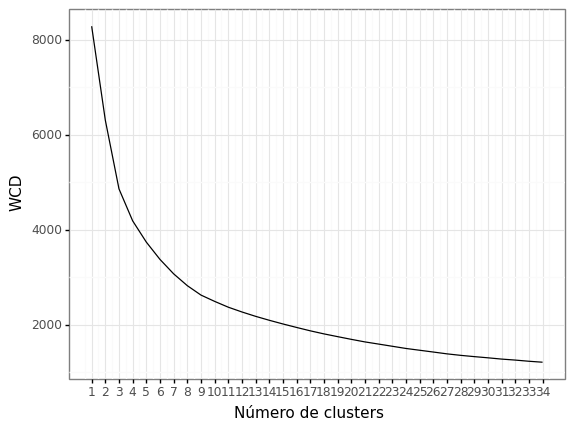

<ggplot: (8769280501318)>

In [6]:

sse = []
numK = 35
for k in range(1, numK):
    kmeans = KMeans(n_clusters=k,n_init=100)
    kmeans.fit(data)
    print(k)
    sse.append(kmeans.inertia_)

print(sse)
tempDataFrame=pd.DataFrame(range(1, numK),columns=["numK"])
tempDataFrame["sse"]=sse
(ggplot(tempDataFrame)+aes(x="numK",y="sse")+theme_bw()+geom_line()+labs(x="Número de clusters",y="WCD")
  +scale_x_continuous(breaks=range(1,numK)))

#### quiero que encuentres os clusters que yo quiero, no los que tu quieres

con init se fuerza la respuesta, que busque dnd yo le digo
ya no tiene libertad, hay una intuición de cuál quiero que sea la respueta3

In [110]:
# Creando el modelo
km = KMeans(n_clusters=9)  
print(km)

# Entrenando el modelo
km=km.fit(data_train)
print(km)

KMeans(n_clusters=9)
KMeans(n_clusters=9)


,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,labels
0,-33.484436,-70.734913,-33.437822,-70.647421,8
1,-33.523092,-70.782872,-33.437234,-70.647150,8
2,-33.455709,-70.631109,-33.437341,-70.647136,7


,LatitudPAB,LongitudPAB,LatitudCOM,LongitudCOM,labels
0,-33.484436,-70.734913,-33.437822,-70.647421,8
1,-33.523092,-70.782872,-33.437234,-70.647150,8
2,-33.455709,-70.631109,-33.437341,-70.647136,7


/Users/sofi/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#ff0000ff', '#ffff00ff', '#008000ff', '#800080ff', '#0000ffff', '#ffc0cbff', '#000000ff', '#ffa500ff', '#a52a2aff']) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


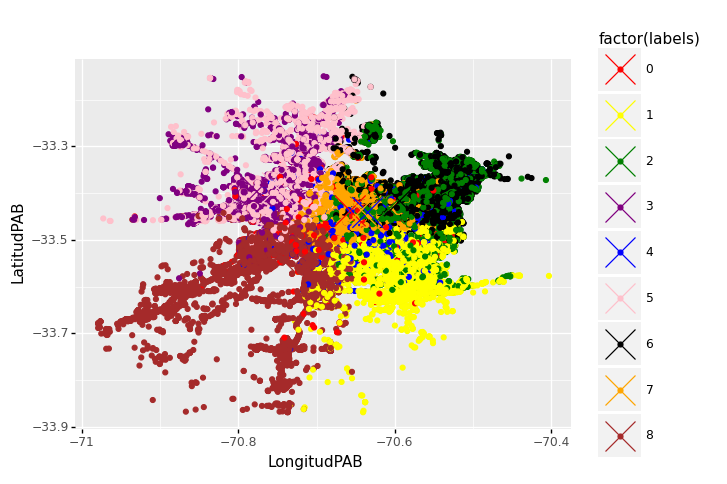

/Users/sofi/opt/anaconda3/lib/python3.8/site-packages/plotnine/geoms/geom_point.py:61: UserWarning: You passed a edgecolor/edgecolors (['#ff0000ff', '#ffff00ff', '#008000ff', '#800080ff', '#0000ffff', '#ffc0cbff', '#000000ff', '#ffa500ff', '#a52a2aff']) for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.


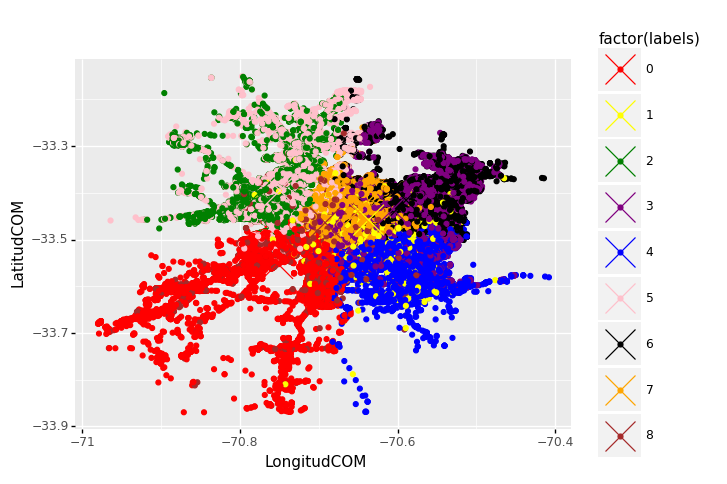

In [111]:
# Data frame con los datos etiquetados, es decir, asignados a un cluster (columna labels)
tempDF=pd.DataFrame(data_train,columns=data_train.columns)
tempDF['labels']=km.labels_
display(data_train.head(3))
display(tempDF.head(3))
#Creando data frame con los centros y etiquetas
tempDF2=pd.DataFrame(km.cluster_centers_,columns=data.columns[0:4])
tempDF2['labels']=range(km.n_clusters)
#creando el gráfico
colores = ['red', 'yellow', 'green', 'purple', 'blue', 'pink', 'black', 'orange', 'brown'] # Paleta de colores

print(ggplot(tempDF)+aes(x="LongitudPAB", y="LatitudPAB",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12)+scale_color_manual(values=colores))
print(ggplot(tempDF)+aes(x="LongitudCOM", y="LatitudCOM",color="factor(labels)")+geom_point()
    +geom_point(data=tempDF2,shape="x",size=12)+scale_color_manual(values=colores))

In [112]:
nombres = np.array([['LatitudPAB', 'LongitudPAB',
                     'LatitudCOM','LongitudCOM']])

clusters = np.array([['Cluster'], [0], [1], [2], [3], [4], [5], [6], [7], [8]])

A = np.concatenate((nombres, km.cluster_centers_), axis=0)
B = np.concatenate((clusters, A), axis=1)

In [113]:
from sympy import Matrix
print('Centroides por variable:')
Matrix(B)   

Centroides por variable:


Matrix([
[Cluster,          LatitudPAB,        LongitudPAB,          LatitudCOM,        LongitudCOM],
[      0,  -33.43793392710896, -70.65696573181187,  -33.55144082789465,  -70.7520657939658],
[      1,  -33.54470322151912,  -70.6038737550691,  -33.45842592752776, -70.63670408355426],
[      2, -33.433135920958684, -70.60726102653167,  -33.40065430540672,  -70.7758063362095],
[      3,  -33.39664815757441, -70.77646330908041, -33.435557904362504, -70.60596877452332],
[      4,  -33.44139378697202, -70.63457868940674,  -33.55296087961006, -70.59637354160216],
[      5, -33.388656563072104, -70.75006377037901,  -33.39503306354879, -70.74932637508584],
[      6,  -33.41658201014128,   -70.593820916568,  -33.41586752780518, -70.58912277489253],
[      7,  -33.43656030695972, -70.64284181484278,  -33.43974171603285, -70.65019936198881],
[      8, -33.534982270472725, -70.74792561065429,  -33.46398953009118, -70.69179109308111]])

In [114]:
puntos = pd.DataFrame(km.cluster_centers_, columns = ['LatitudPAB', 'LongitudPAB','LatitudCOM','LongitudCOM'])
puntos = puntos[['LongitudPAB', 'LongitudCOM', 'LatitudPAB', 'LatitudCOM']]
puntoss = np.array(puntos)
puntoss

array([[-70.65696573, -70.75206579, -33.43793393, -33.55144083],
       [-70.60387376, -70.63670408, -33.54470322, -33.45842593],
       [-70.60726103, -70.77580634, -33.43313592, -33.40065431],
       [-70.77646331, -70.60596877, -33.39664816, -33.4355579 ],
       [-70.63457869, -70.59637354, -33.44139379, -33.55296088],
       [-70.75006377, -70.74932638, -33.38865656, -33.39503306],
       [-70.59382092, -70.58912277, -33.41658201, -33.41586753],
       [-70.64284181, -70.65019936, -33.43656031, -33.43974172],
       [-70.74792561, -70.69179109, -33.53498227, -33.46398953]])

In [82]:
for i in range(9):
    print(f"'X{i}': puntoss[{i}][0:2],")
    print(f"'Y{i}': puntoss[{i}][2:],")

'X0': puntoss[0][0:2],
'Y0': puntoss[0][2:],
'X1': puntoss[1][0:2],
'Y1': puntoss[1][2:],
'X2': puntoss[2][0:2],
'Y2': puntoss[2][2:],
'X3': puntoss[3][0:2],
'Y3': puntoss[3][2:],
'X4': puntoss[4][0:2],
'Y4': puntoss[4][2:],
'X5': puntoss[5][0:2],
'Y5': puntoss[5][2:],
'X6': puntoss[6][0:2],
'Y6': puntoss[6][2:],
'X7': puntoss[7][0:2],
'Y7': puntoss[7][2:],
'X8': puntoss[8][0:2],
'Y8': puntoss[8][2:],


In [116]:
graficar = pd.DataFrame({
    'X0': puntoss[0][0:2],
    'Y0': puntoss[0][2:],
    'X1': puntoss[1][0:2],
    'Y1': puntoss[1][2:],
    'X2': puntoss[2][0:2],
    'Y2': puntoss[2][2:],
    'X3': puntoss[3][0:2],
    'Y3': puntoss[3][2:],
    'X4': puntoss[4][0:2],
    'Y4': puntoss[4][2:],
    'X5': puntoss[5][0:2],
    'Y5': puntoss[5][2:],
    'X6': puntoss[6][0:2],
    'Y6': puntoss[6][2:],
    'X7': puntoss[7][0:2],
    'Y7': puntoss[7][2:],
    'X8': puntoss[8][0:2],
    'Y8': puntoss[8][2:]})

display(graficar)

for i in range(9):
    print(f"+ geom_line(aes(x= 'X{i}', y='Y{i}'), color='{colores[i]}', size=1)")


,X0,Y0,X1,Y1,X2,Y2,X3,Y3,X4,Y4,X5,Y5,X6,Y6,X7,Y7,X8,Y8
0,-70.656966,-33.437934,-70.603874,-33.544703,-70.607261,-33.433136,-70.776463,-33.396648,-70.634579,-33.441394,-70.750064,-33.388657,-70.593821,-33.416582,-70.642842,-33.436560,-70.747926,-33.534982
1,-70.752066,-33.551441,-70.636704,-33.458426,-70.775806,-33.400654,-70.605969,-33.435558,-70.596374,-33.552961,-70.749326,-33.395033,-70.589123,-33.415868,-70.650199,-33.439742,-70.691791,-33.463990


+ geom_line(aes(x= 'X0', y='Y0'), color='red', size=1)
+ geom_line(aes(x= 'X1', y='Y1'), color='yellow', size=1)
+ geom_line(aes(x= 'X2', y='Y2'), color='green', size=1)
+ geom_line(aes(x= 'X3', y='Y3'), color='purple', size=1)
+ geom_line(aes(x= 'X4', y='Y4'), color='blue', size=1)
+ geom_line(aes(x= 'X5', y='Y5'), color='pink', size=1)
+ geom_line(aes(x= 'X6', y='Y6'), color='black', size=1)
+ geom_line(aes(x= 'X7', y='Y7'), color='orange', size=1)
+ geom_line(aes(x= 'X8', y='Y8'), color='brown', size=1)


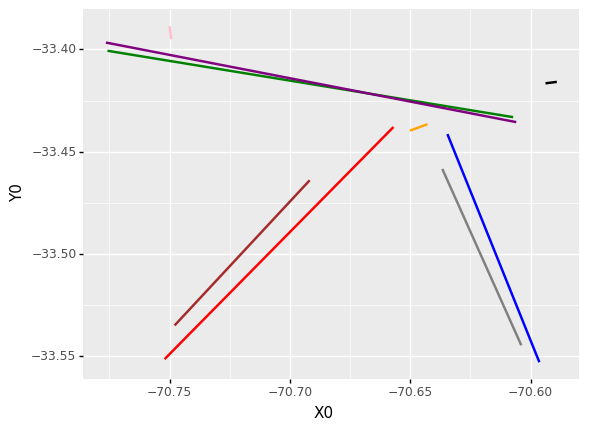

<ggplot: (8769230157644)>

In [117]:
(ggplot(graficar)+ geom_line(aes(x= 'X0', y='Y0'), color='red', size=1)
+ geom_line(aes(x= 'X1', y='Y1'), color='gray', size=1)
+ geom_line(aes(x= 'X2', y='Y2'), color='green', size=1)
+ geom_line(aes(x= 'X3', y='Y3'), color='purple', size=1)
+ geom_line(aes(x= 'X4', y='Y4'), color='blue', size=1)
+ geom_line(aes(x= 'X5', y='Y5'), color='pink', size=1)
+ geom_line(aes(x= 'X6', y='Y6'), color='black', size=1)
+ geom_line(aes(x= 'X7', y='Y7'), color='orange', size=1)
+ geom_line(aes(x= 'X8', y='Y8'), color='brown', size=1))

In [131]:
WCD = []
for i in range(0,9):
    cluster = data_train[data_train['labels'] == i]
    cluster.drop(columns=['labels'], inplace=True)
    centroide = km.cluster_centers_[i]

    distancia_al_centroide = np.linalg.norm(cluster - centroide, axis=1)
    distancia_intra_cluster = np.sum(distancia_al_centroide)
    WCD.append(distancia_intra_cluster)
    
C = Matrix([round(numero) for numero in WCD])

print("El promedio es:", round(sum(WCD) / len(WCD)))

lista = []
for i in range(9):
    if (WCD[i] >= round(sum(WCD) / len(WCD))):
        lista.append([i,'Incorrecto'])
    else:
        lista.append([i,'Correcto'])

D = np.concatenate((lista1, C), axis=1)
Matrix(D)


<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-

El promedio es: 3336


<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<ipython-input-131-8ceb37c83d01>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Matrix([
[0,   Correcto, 2282],
[1,   Correcto, 2171],
[2, Incorrecto, 4179],
[3, Incorrecto, 3742],
[4,   Correcto, 2200],
[5,   Correcto, 2767],
[6, Incorrecto, 4911],
[7, Incorrecto, 5338],
[8,   Correcto, 2431]])